<a href="https://colab.research.google.com/github/angelaaaateng/ftw_python/blob/main/Feature_Engineering_B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

01 Feature engineering
===
Feature engineering is the process of transforming raw data into features that better represent the underlying problem to the predictive models, resulting in improved model accuracy on unseen data. Feature engineering turn your inputs into things the algorithm can understand.

In [25]:
# IMPORT GENERIC PACKAGES
import numpy as np # numerical calc package
import pandas as pd # holds data
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # pretty plotting

# plotting config
sns.set(style='white', rc={'figure.figsize':(20,10)})

Data Loading

In [26]:
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv")
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


### Dummy Variables ###

In [27]:
df.day.head()

0    fri
1    tue
2    sat
3    fri
4    sun
Name: day, dtype: object

In [28]:
pd.get_dummies(df.day).head()

,fri,mon,sat,sun,thu,tue,wed
0,1,0,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0


In [29]:
# alternative: OneHotEncoder

### Feature Scaling ###

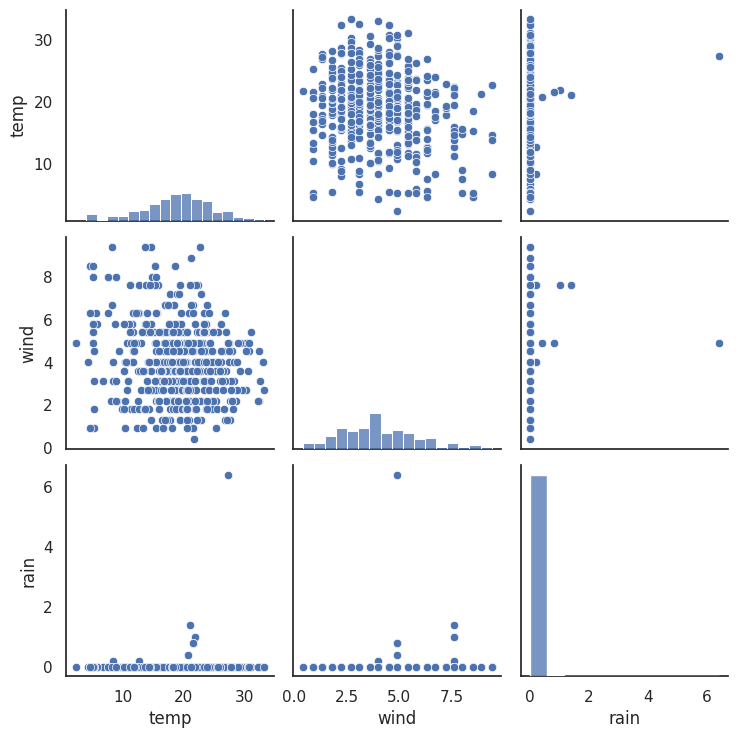

In [30]:
data = df[['temp','wind','rain']]
sns.pairplot(data)

In [31]:
from sklearn.preprocessing import StandardScaler

# Instantiate Standard Scaler
scaler = StandardScaler()
scaler.fit(data)

# Transform Original Data to zero mean and unit variance
transformed_data = scaler.transform(data)

# Convert to original dataframe schema
transformed_data_df = pd.DataFrame(transformed_data, columns=data.columns)

In [32]:
data.head()

,temp,wind,rain
0,8.2,6.7,0.0
1,18.0,0.9,0.0
2,14.6,1.3,0.0
3,8.3,4.0,0.2
4,11.4,1.8,0.0


In [33]:
transformed_data_df.head()

,temp,wind,rain
0,-1.842640,1.498614,-0.073268
1,-0.153278,-1.741756,-0.073268
2,-0.739383,-1.518282,-0.073268
3,-1.825402,-0.009834,0.603155
4,-1.291012,-1.238940,-0.073268


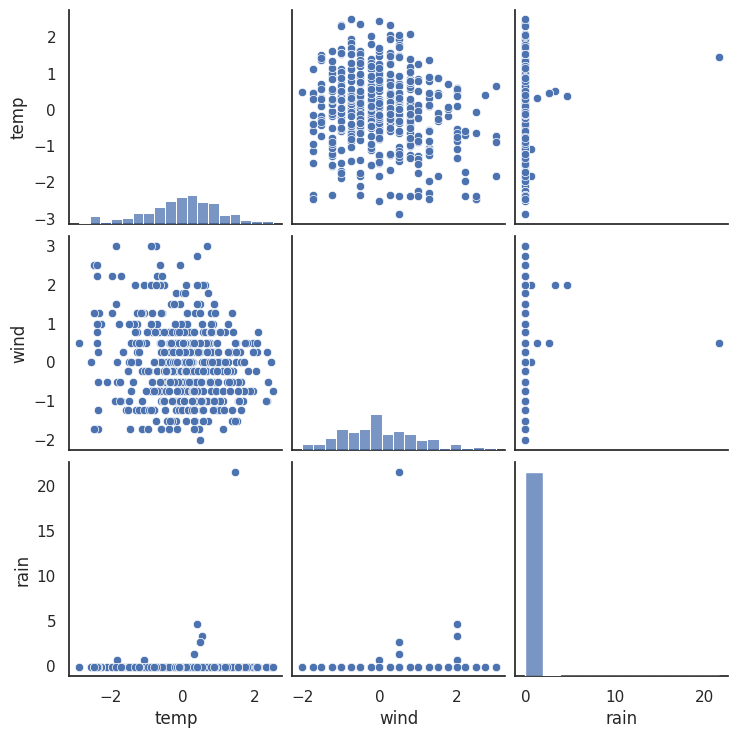

In [34]:
sns.pairplot(transformed_data_df)

# Label Encoder

In [35]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
# creating initial dataframe
bridge_types = ('Arch','Beam','Truss','Cantilever','Tied Arch','Suspension','Cable')
bridge_df = pd.DataFrame(bridge_types, columns=['Bridge_Types'])
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
bridge_df['Bridge_Types_Cat'] = labelencoder.fit_transform(bridge_df['Bridge_Types'])
bridge_df

,Bridge_Types,Bridge_Types_Cat
0,Arch,0
1,Beam,1
2,Truss,6
3,Cantilever,3
4,Tied Arch,5
5,Suspension,4
6,Cable,2


### Binning ###

In [36]:
df.rain.describe()

count    517.000000
mean       0.021663
std        0.295959
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.400000
Name: rain, dtype: float64

Minimum is 0

Maximum is 6.4

Let's create 6 bins.

In [37]:
# Set Bins
# We start with a negative bin to include zeroes.
# Check documentation for more info on bins:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html

bins = [-0.01, 1, 2, 3, 4, 5, 6]

# Create Group Names
group_names = ['0-0.99','1-1.99','2-2.99','3-3.99','4-4.99','5-5.99']

rainfall_categories = pd.cut(data['rain'], bins, labels=group_names)

rainfall_categories.head()

0    0-0.99
1    0-0.99
2    0-0.99
3    0-0.99
4    0-0.99
Name: rain, dtype: category
Categories (6, object): ['0-0.99' < '1-1.99' < '2-2.99' < '3-3.99' < '4-4.99' < '5-5.99']

In [38]:
rainfall_categories.value_counts()

0-0.99    515
1-1.99      1
2-2.99      0
3-3.99      0
4-4.99      0
5-5.99      0
Name: rain, dtype: int64

### Handling Missing Data ###

In [39]:
weather_data = pd.read_csv("https://raw.githubusercontent.com/angelaaaateng/ftw_python/main/data/weather.csv")
weather_data.head()

<ipython-input-39-a54bf610c47c>:1: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  weather_data = pd.read_csv("https://raw.githubusercontent.com/angelaaaateng/ftw_python/main/data/weather.csv")


,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
# Drop missing data. Easiest but not advisable.
weather_data_dropped = weather_data.dropna(axis=0, subset=['WindGustSpd'])
weather_data_dropped.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
51177,20602,1945-2-1,11.43,29.632,27.222222,22.222222,25.000000,0,NaN,45,...,NaN,NaN,NaN,10.2,NaN,NaN,NaN,NaN,NaN,NaN
51178,20602,1945-2-2,12.7,59.264,27.777778,22.777778,25.555556,0,NaN,45,...,NaN,NaN,NaN,10.2,NaN,NaN,NaN,NaN,NaN,NaN
51179,20602,1945-2-3,4.064,50.004,27.777778,22.777778,25.555556,0,NaN,45,...,NaN,NaN,NaN,1.1,NaN,NaN,NaN,NaN,NaN,NaN
51180,20602,1945-2-4,22.606,40.744,26.666667,23.888889,25.555556,0,NaN,45,...,NaN,NaN,NaN,10.4,NaN,NaN,NaN,NaN,NaN,NaN
51181,20602,1945-2-5,73.914,51.856,26.111111,23.888889,25.000000,0,NaN,45,...,NaN,NaN,NaN,11.6,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
# Impute missing data. Most appropriate method.

# Get from dataframe only the columns we want to impute.
to_impute_data = weather_data[['WindGustSpd','MaxTemp','MinTemp','MeanTemp']]
to_impute_data.head()

,WindGustSpd,MaxTemp,MinTemp,MeanTemp
0,NaN,25.555556,22.222222,23.888889
1,NaN,28.888889,21.666667,25.555556
2,NaN,26.111111,22.222222,24.444444
3,NaN,26.666667,22.222222,24.444444
4,NaN,26.666667,21.666667,24.444444


In [42]:
from sklearn.impute import SimpleImputer

# Mean imputation( can be imputed by 'mean', 'median', 'most_frequent', 'constant')
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

# Fit the imputer on the data needed to impute
imp.fit(to_impute_data.values)

# Transform original data to impute based on choice of imputation parameter (mean, median, etc)
imputed_data = imp.transform(to_impute_data.values)

# Convert imputed data to original data schema
imputed_data_df = pd.DataFrame(imputed_data, columns=to_impute_data.columns)
imputed_data_df.head()

,WindGustSpd,MaxTemp,MinTemp,MeanTemp
0,37.774534,25.555556,22.222222,23.888889
1,37.774534,28.888889,21.666667,25.555556
2,37.774534,26.111111,22.222222,24.444444
3,37.774534,26.666667,22.222222,24.444444
4,37.774534,26.666667,21.666667,24.444444


### Merge Data

In [43]:
df1 = pd.DataFrame({'lkey': ['foo','bar','baz','foo'],
                    'value': [1,2,3,5]})

df2 = pd.DataFrame({'rkey':['foo','bar','baz','foo'],
                    'value': [5,6,7,8]})

In [44]:
df1

,lkey,value
0,foo,1
1,bar,2
2,baz,3
3,foo,5


In [45]:
df2

,rkey,value
0,foo,5
1,bar,6
2,baz,7
3,foo,8


In [46]:
df1.merge(df2, left_on='lkey', right_on='rkey')

,lkey,value_x,rkey,value_y
0,foo,1,foo,5
1,foo,1,foo,8
2,foo,5,foo,5
3,foo,5,foo,8
4,bar,2,bar,6
5,baz,3,baz,7


In [47]:
df1.merge(df2, left_on='lkey', right_on='rkey',
          suffixes=('_left','_right'))

,lkey,value_left,rkey,value_right
0,foo,1,foo,5
1,foo,1,foo,8
2,foo,5,foo,5
3,foo,5,foo,8
4,bar,2,bar,6
5,baz,3,baz,7
